In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv("Data_Processed/Recommendation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          97233 non-null  object 
 1   Crop_Type           97233 non-null  object 
 2   Crop                97233 non-null  object 
 3   N                   97233 non-null  int64  
 4   P                   97233 non-null  int64  
 5   K                   97233 non-null  int64  
 6   pH                  97233 non-null  float64
 7   rainfall            97233 non-null  float64
 8   temperature         97233 non-null  float64
 9   Area_in_hectares    97233 non-null  float64
 10  Production_in_tons  97233 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.2+ MB


In [152]:
df = df.drop(["Production_in_tons"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_Name        97233 non-null  object 
 1   Crop_Type         97233 non-null  object 
 2   Crop              97233 non-null  object 
 3   N                 97233 non-null  int64  
 4   P                 97233 non-null  int64  
 5   K                 97233 non-null  int64  
 6   pH                97233 non-null  float64
 7   rainfall          97233 non-null  float64
 8   temperature       97233 non-null  float64
 9   Area_in_hectares  97233 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 7.4+ MB


Data Visualization

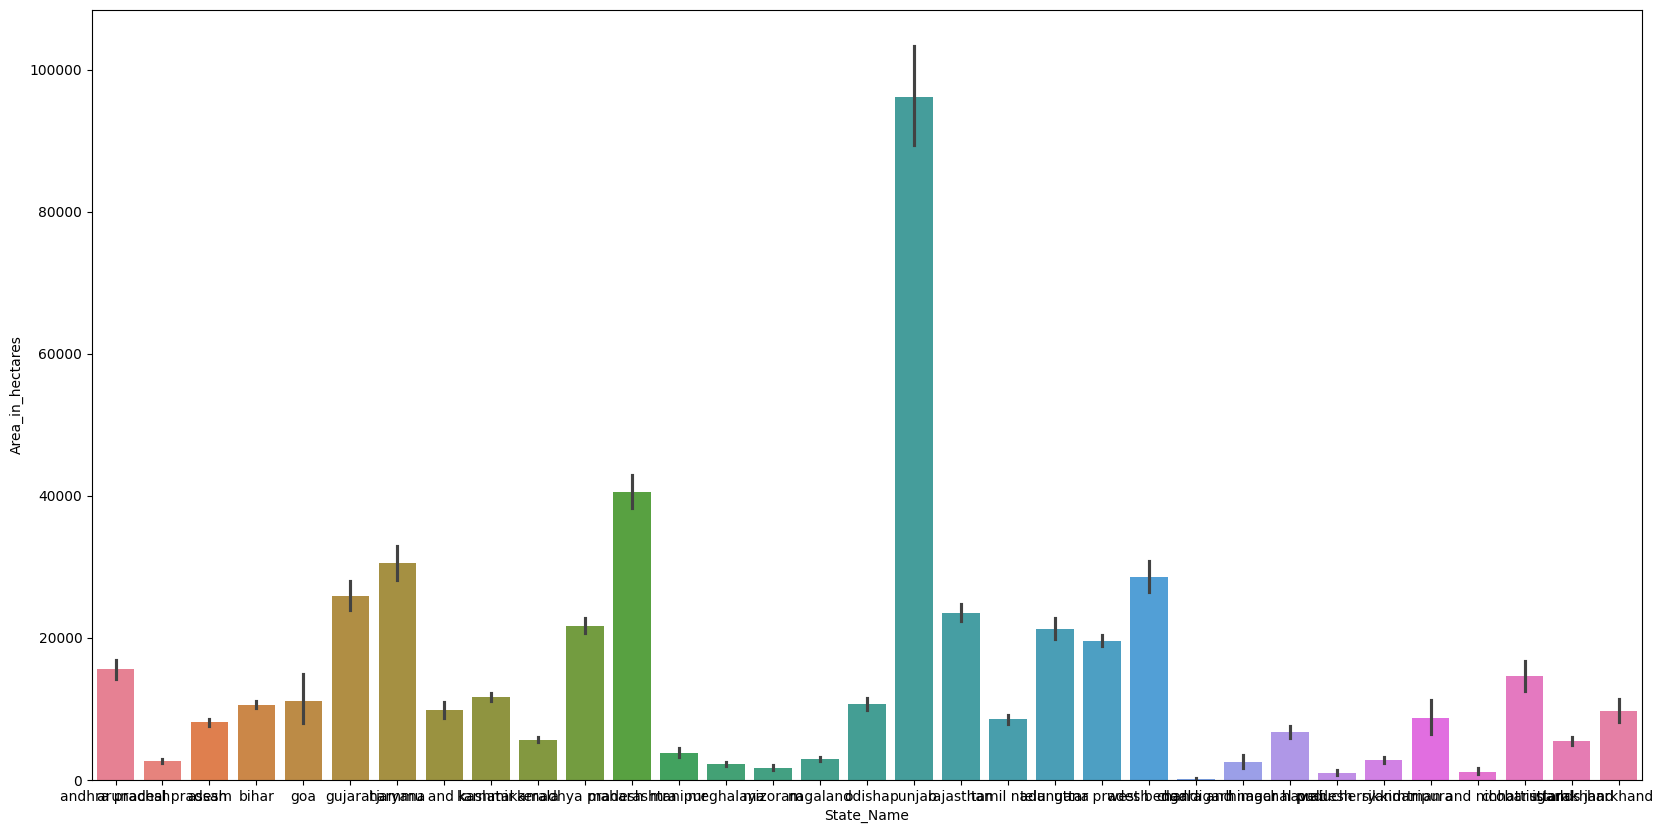

In [153]:
plt.figure(figsize=(20,10))
sns.barplot(df,x="State_Name",y="Area_in_hectares",hue="State_Name")
plt.show()

In [154]:
x = 30
y = 10

In [155]:
def Plotter(feature):
    if df[feature].dtype != "object":
        fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
        sns.histplot(df[feature],ax=ax[0])
        ax[0].set_title("Histplot")
        sns.kdeplot(df[feature],ax=ax[1])
        ax[1].set_title("PDF")
        sns.boxplot(df[feature],ax=ax[2])
        ax[2].set_title("Box_Plot")
        plt.tight_layout()
        plt.show()
    else:
        fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
        sns.histplot(df[feature],ax=ax[0])
        ax[0].set_title("Histplot")
        sns.boxplot(df[feature],ax=ax[1])
        ax[1].set_title("Box_Plot")
        plt.tight_layout()
        plt.show()

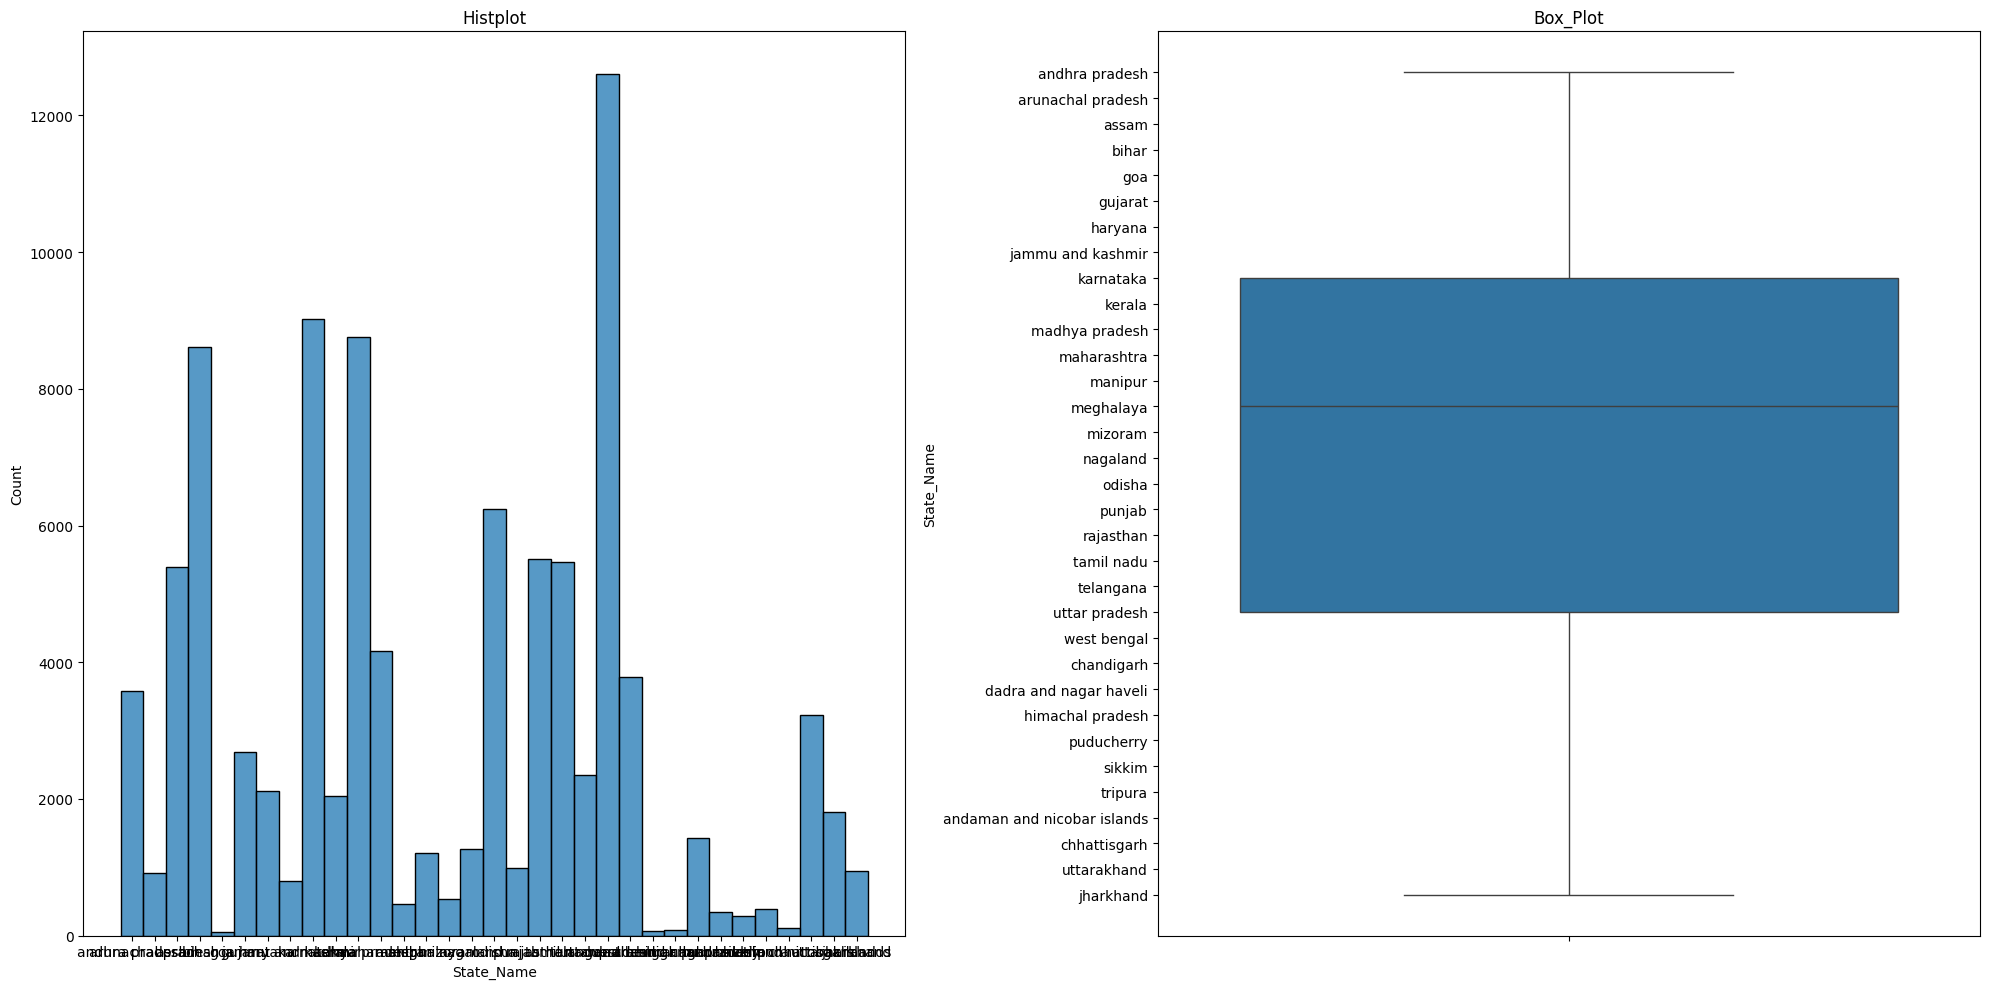

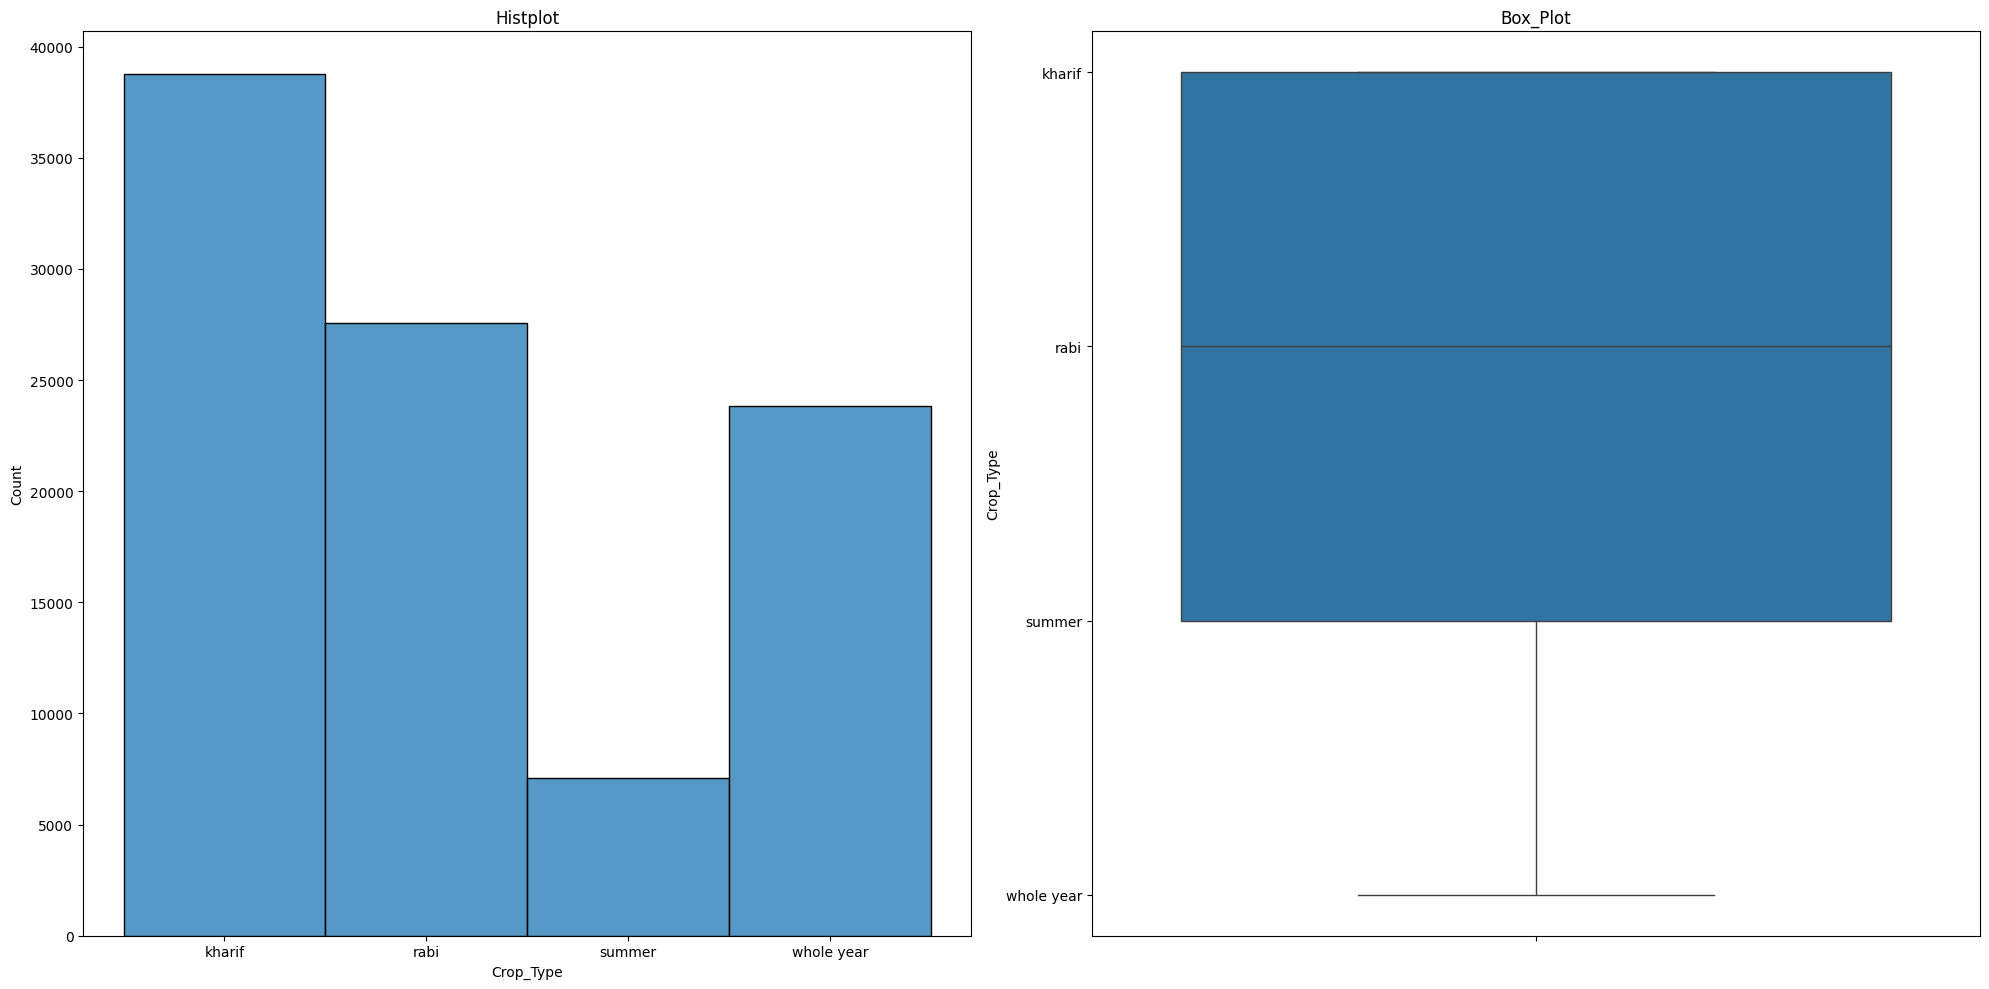

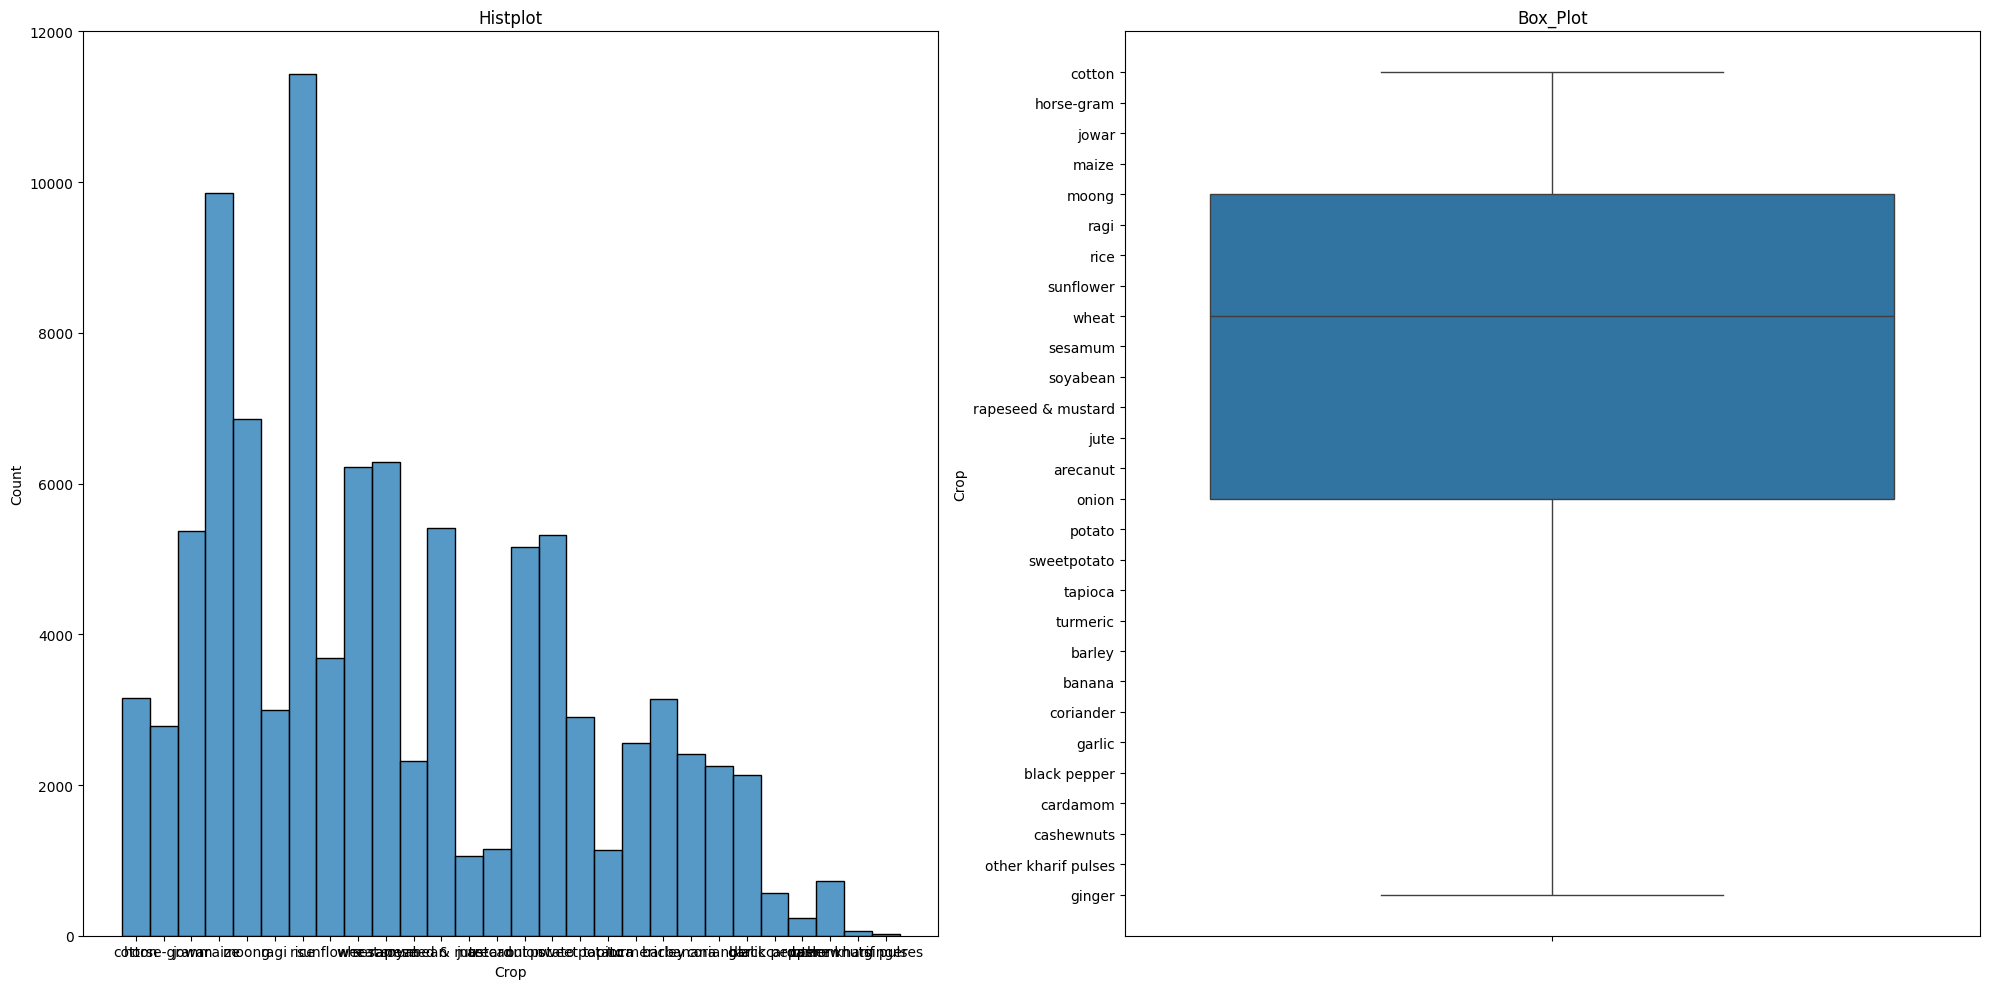

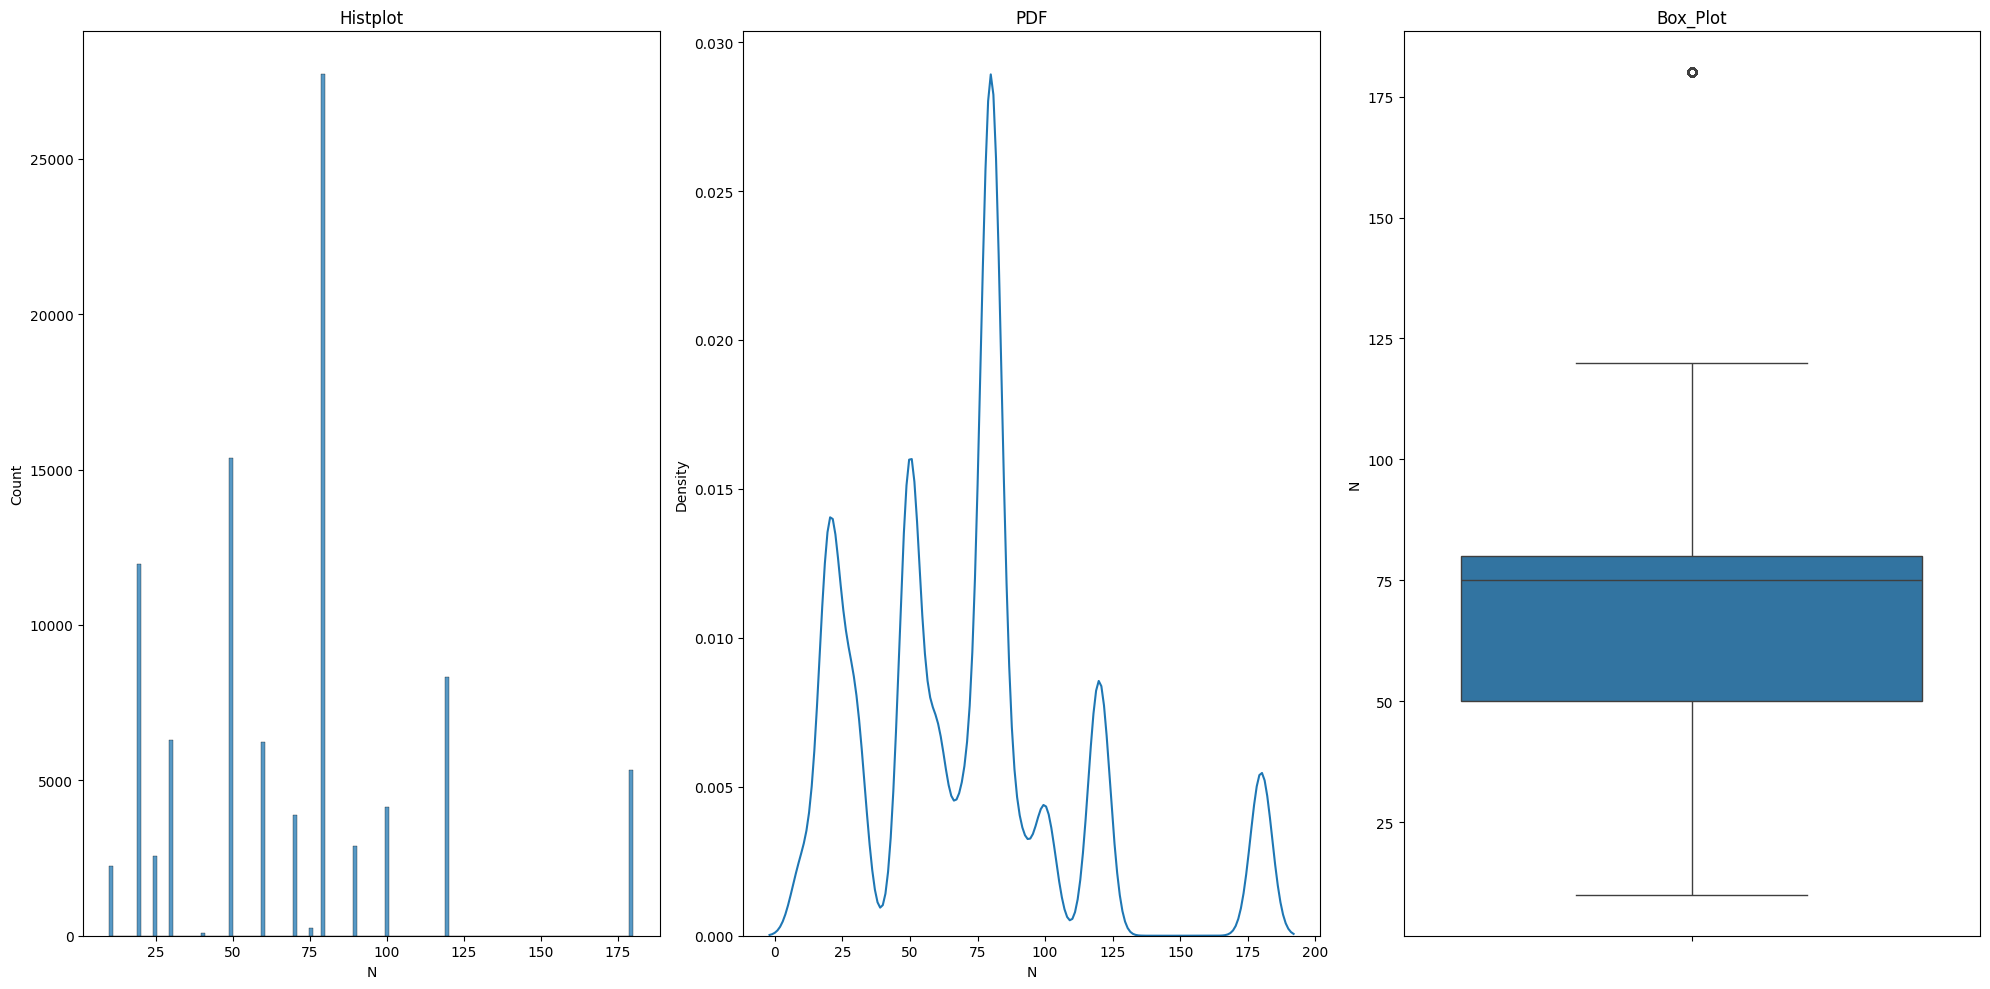

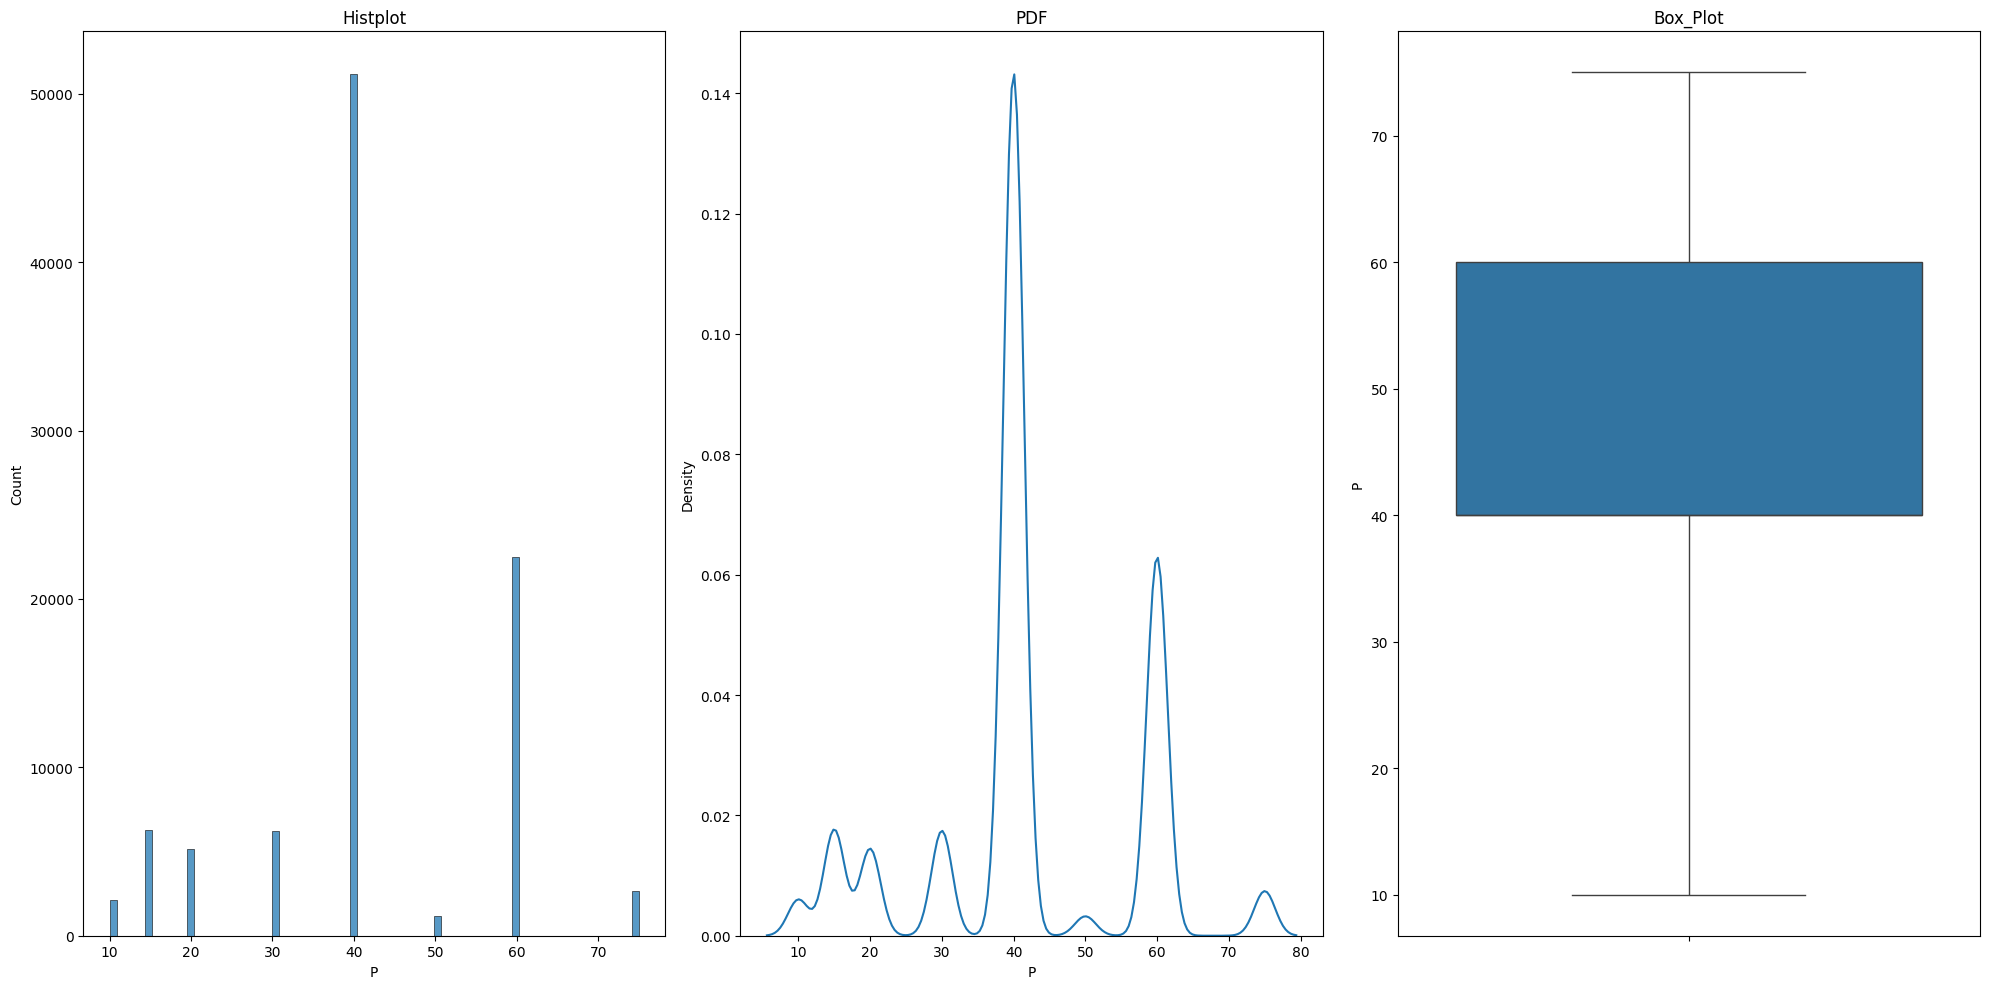

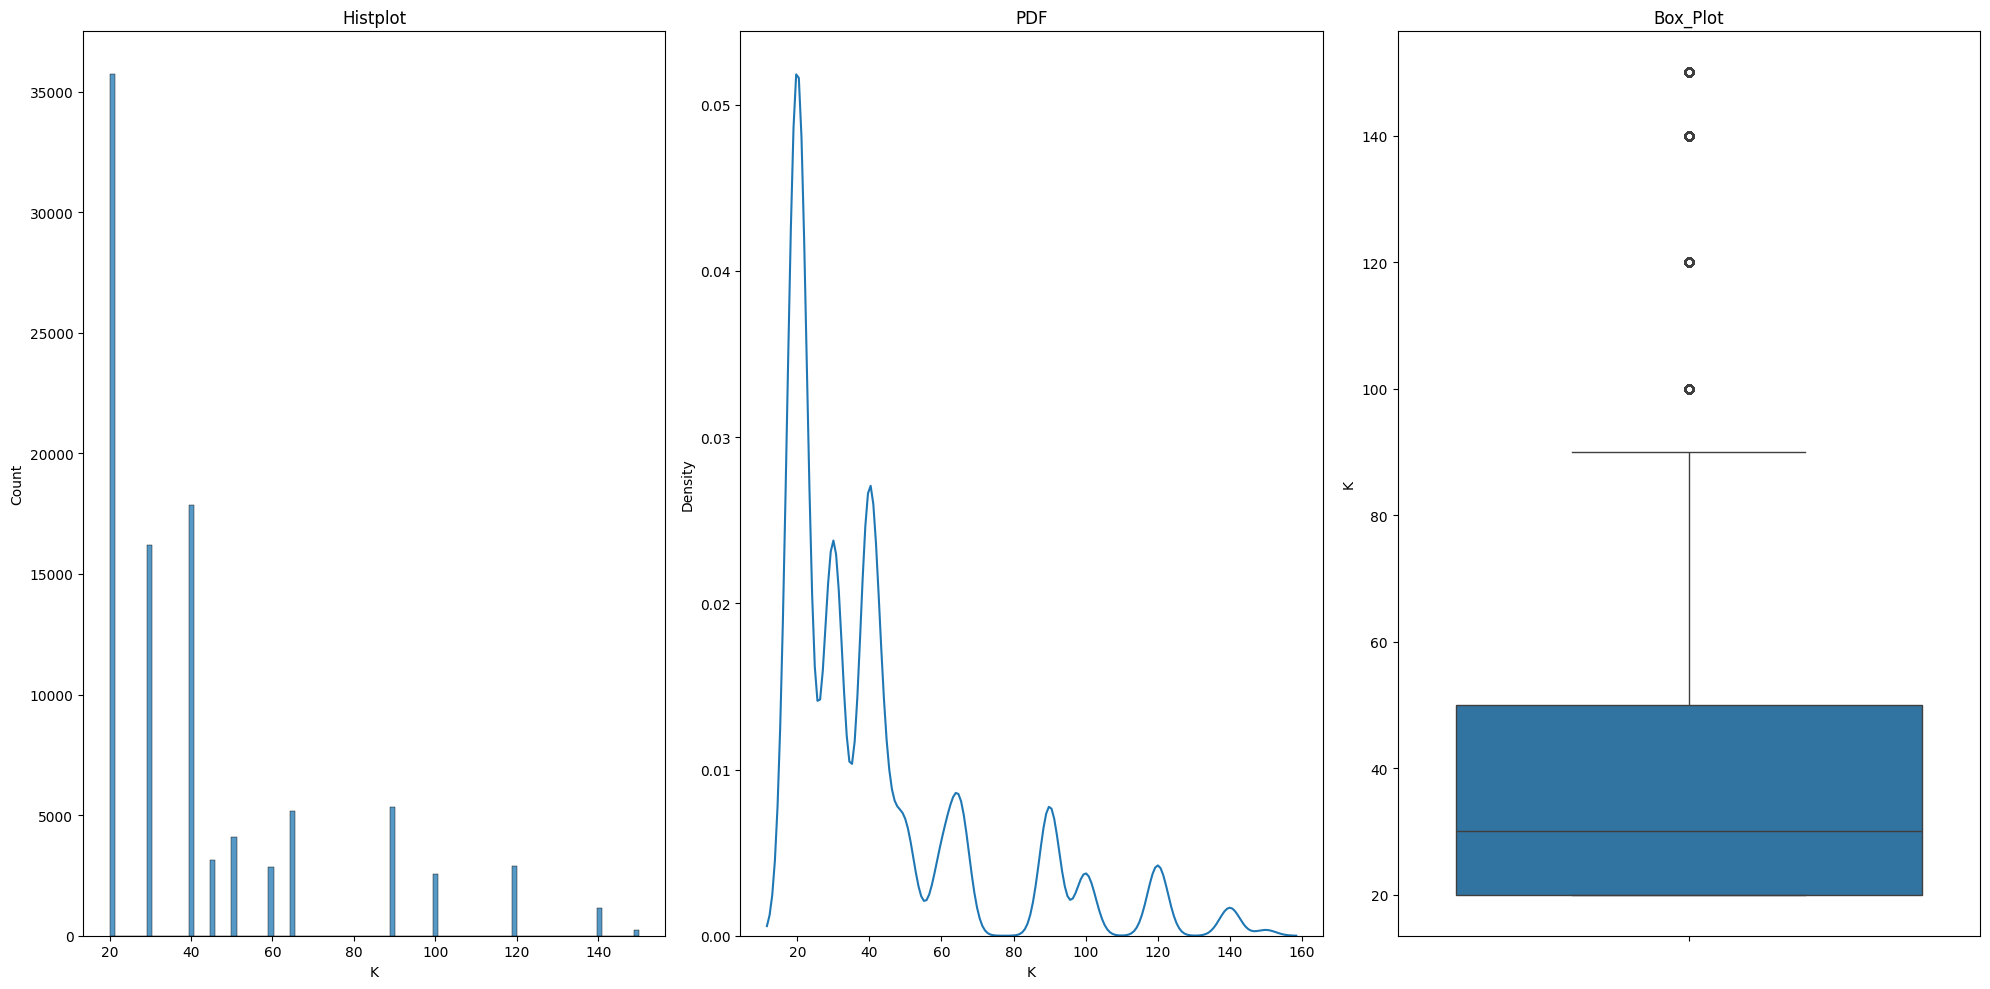

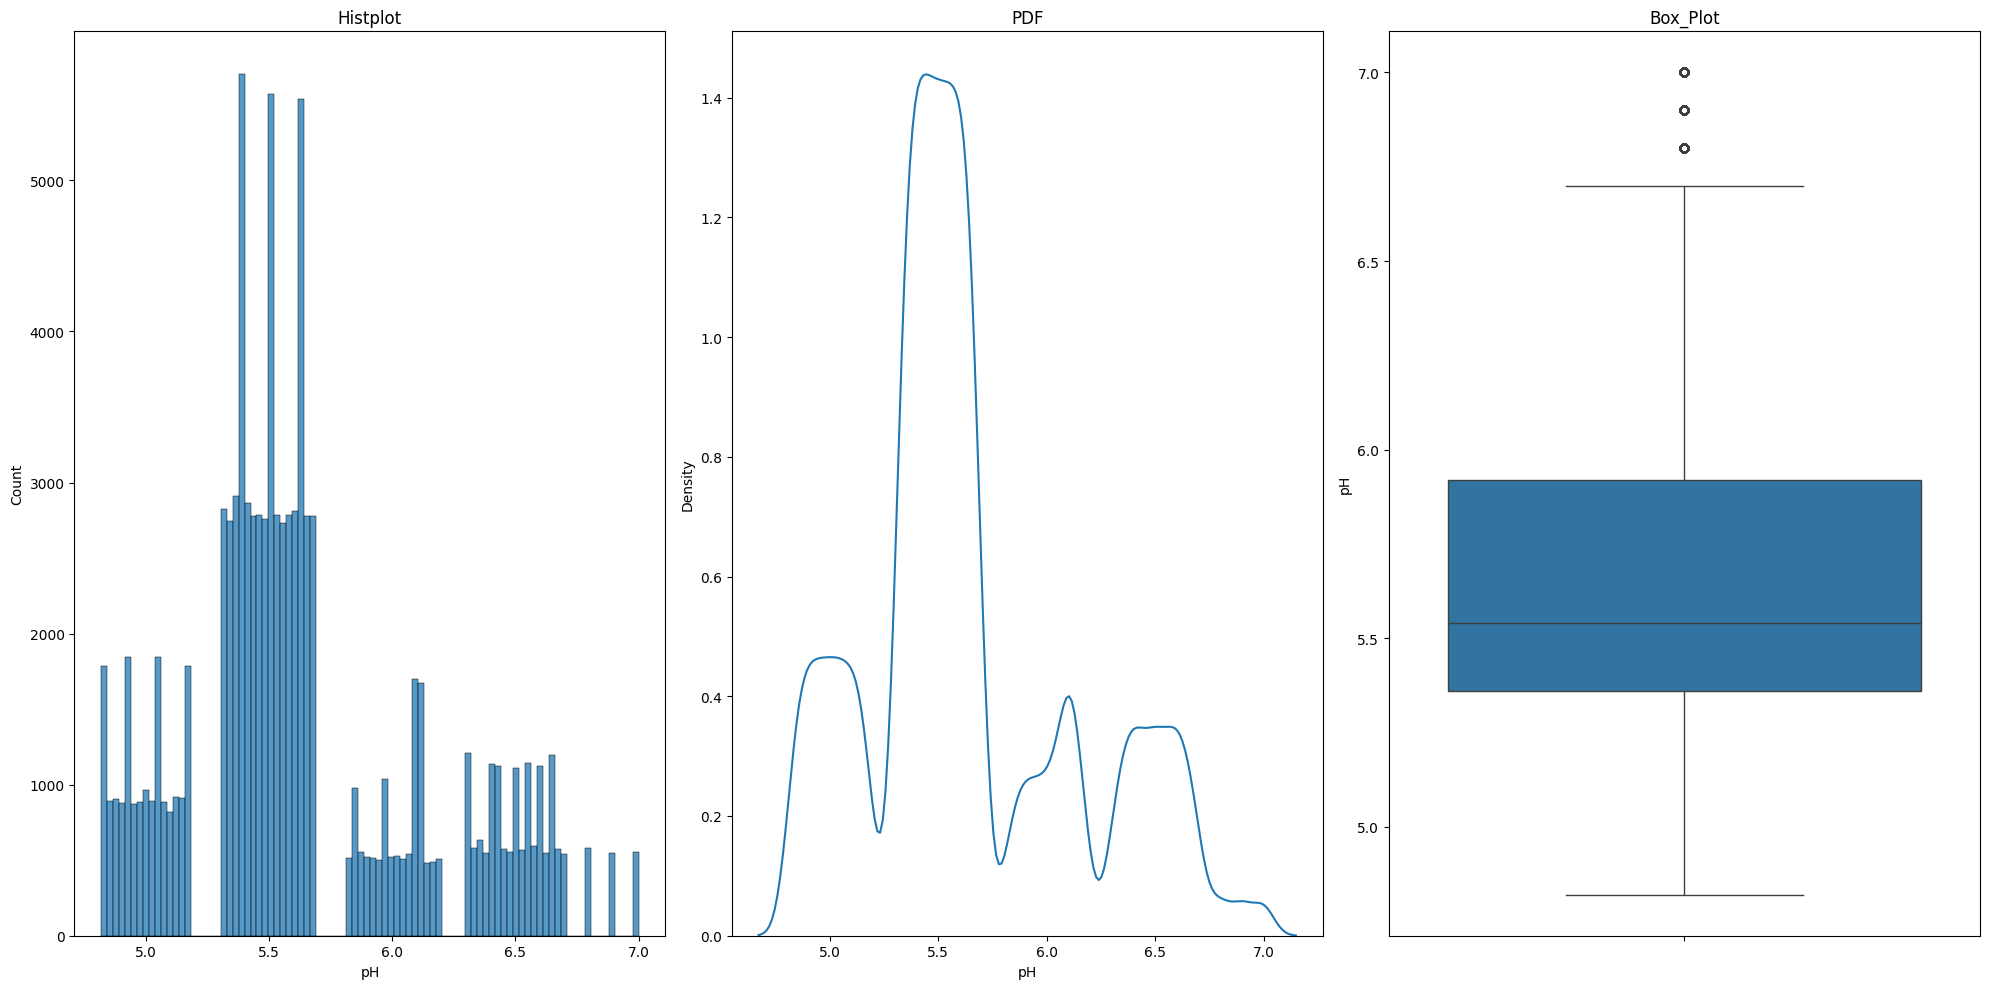

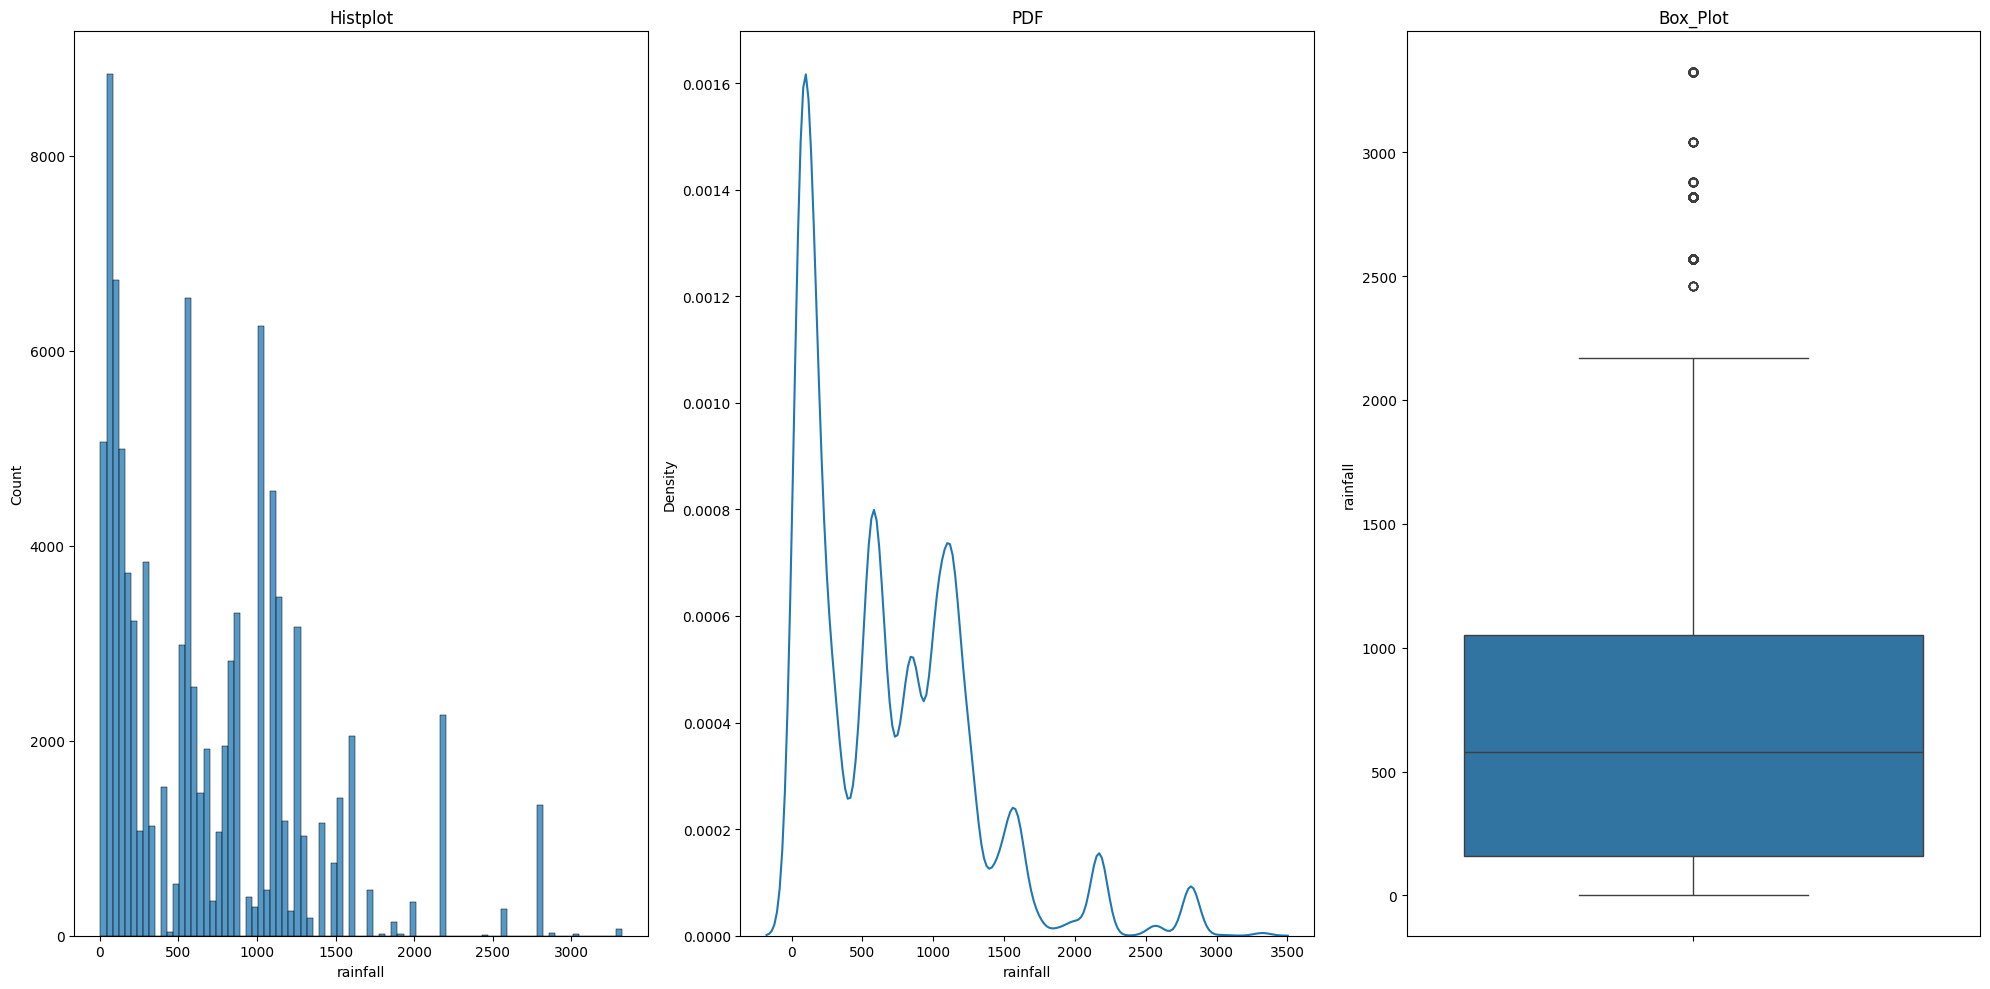

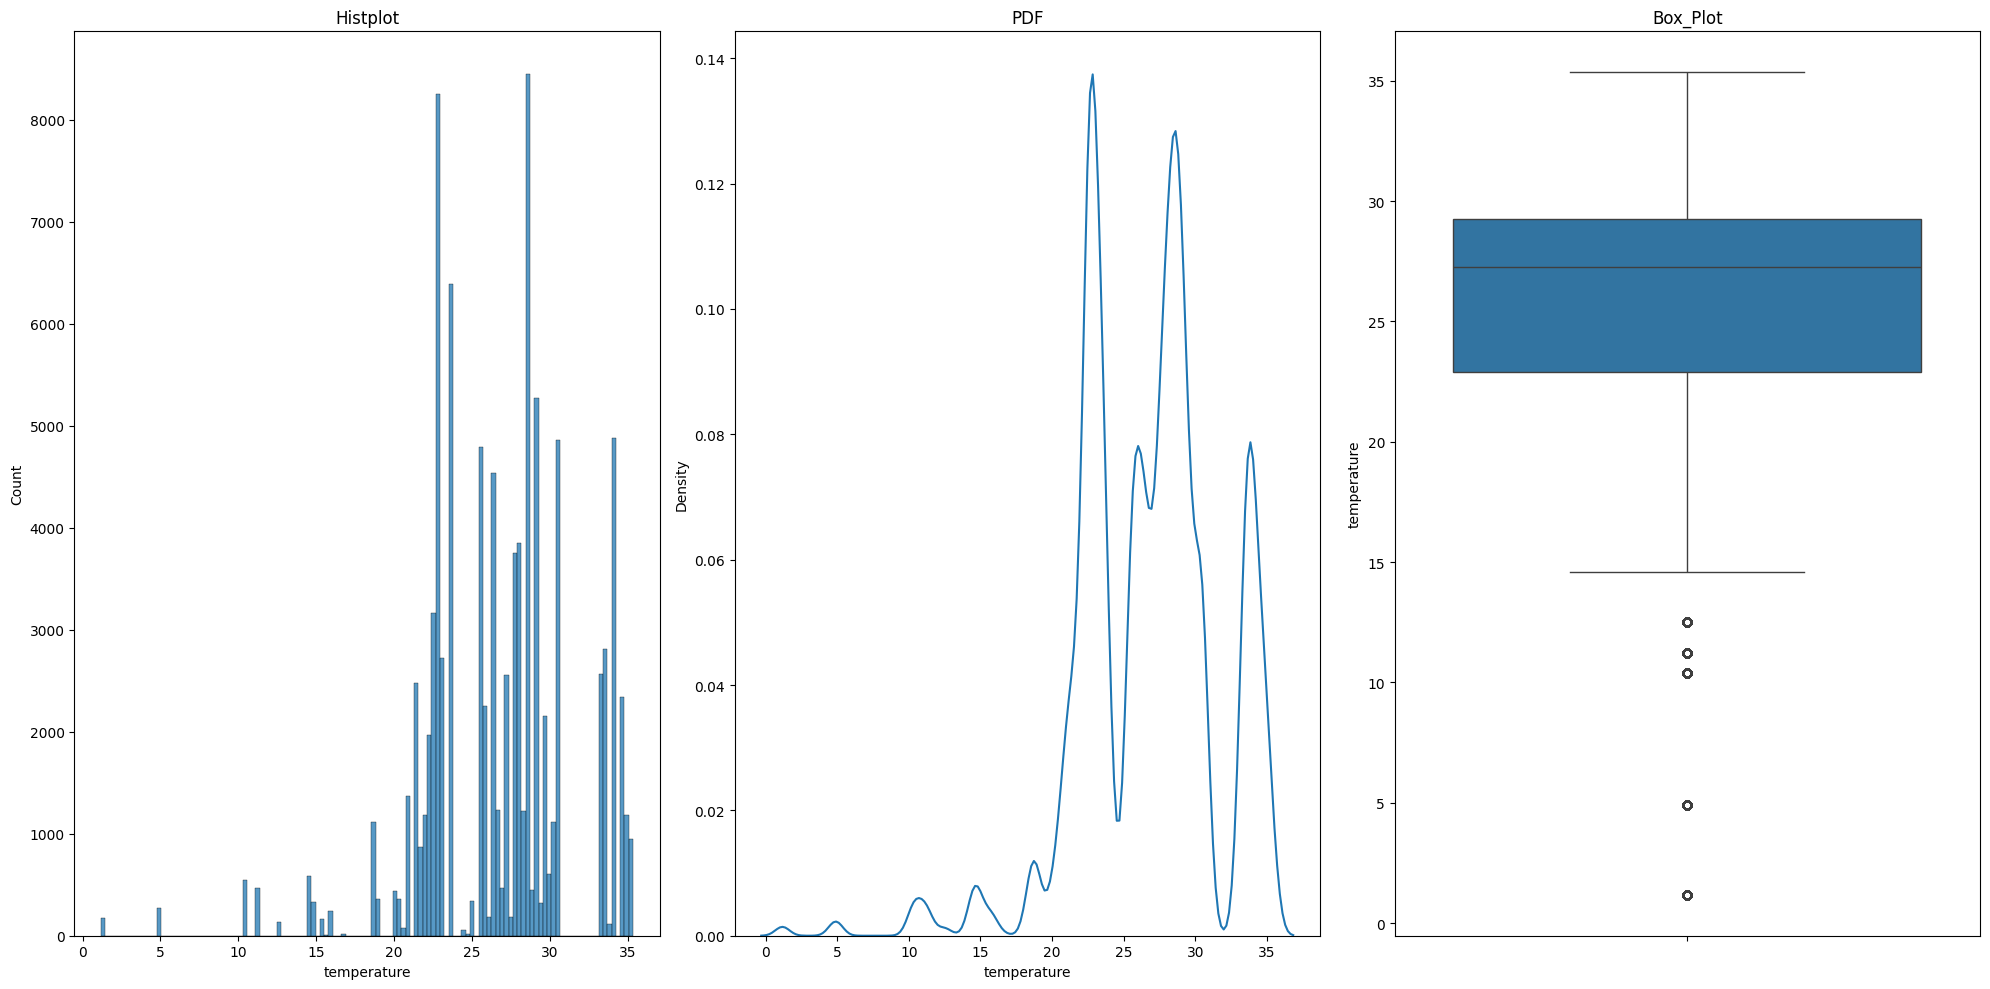

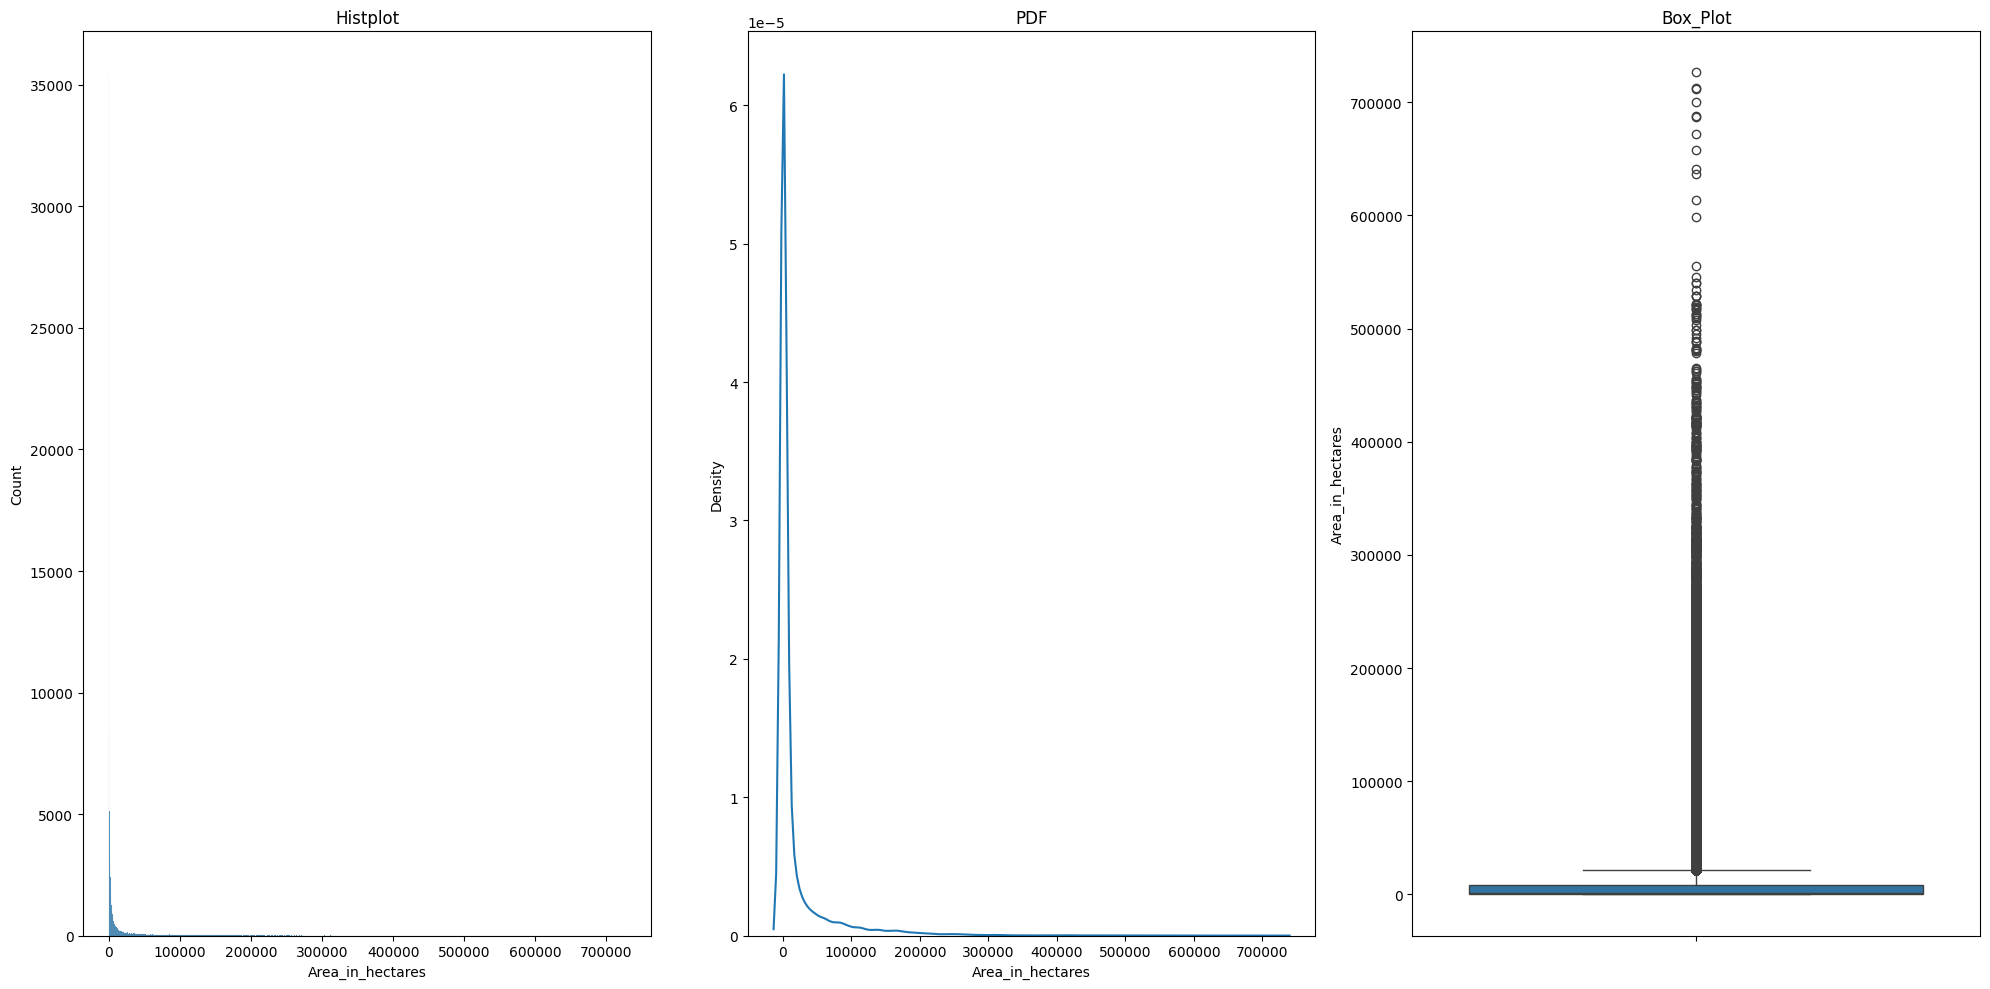

In [156]:
for i in df.columns:
    Plotter(i)

In [157]:
def outlier_counter(feature):
    A = df[feature].quantile(0.75)
    B = df[feature].quantile(0.25)
    IQR = A - B
    ub = A + 1.5*IQR
    lb = B - 1.5*IQR
    T = []
    for i in df[feature].values:
        if i < lb:
            T.append(i)
        elif i > ub:
            T.append(i)
        else:
            pass
    return len(T)

In [158]:
for i in df.columns:
    if df[i].dtype != "object":
        k = outlier_counter(i)
        print(f"{i} has {k} outliers , which means {k/len(df)*100:.4f}% of the data is outlier")


N has 5324 outliers , which means 5.4755% of the data is outlier
P has 0 outliers , which means 0.0000% of the data is outlier
K has 6852 outliers , which means 7.0470% of the data is outlier
pH has 1684 outliers , which means 1.7319% of the data is outlier
rainfall has 1742 outliers , which means 1.7916% of the data is outlier
temperature has 1596 outliers , which means 1.6414% of the data is outlier
Area_in_hectares has 16183 outliers , which means 16.6435% of the data is outlier


In [159]:
def outlier_remover(feature):
    A = df[feature].quantile(0.75)
    B = df[feature].quantile(0.25)
    IQR = A - B
    ub = A + 1.5*IQR
    lb = B - 1.5*IQR
    df.loc[df[feature] < lb, feature] = lb
    df.loc[df[feature] > ub, feature] = ub
    return 0

In [160]:
outlier_remover("N")
outlier_remover("K")
outlier_remover("pH")
outlier_remover("rainfall")
outlier_remover("temperature")

0

In [161]:
for i in df.columns:
    if df[i].dtype != "object":
        k = outlier_counter(i)
        print(f"{i} has {k} outliers , which means {k/len(df)*100:.4f}% of the data is outlier")

N has 0 outliers , which means 0.0000% of the data is outlier
P has 0 outliers , which means 0.0000% of the data is outlier
K has 0 outliers , which means 0.0000% of the data is outlier
pH has 0 outliers , which means 0.0000% of the data is outlier
rainfall has 0 outliers , which means 0.0000% of the data is outlier
temperature has 0 outliers , which means 0.0000% of the data is outlier
Area_in_hectares has 16183 outliers , which means 16.6435% of the data is outlier


In [162]:
import scipy.stats as ss
def Boxcox_comparator(feature):
    transformed,lambda1 = ss.boxcox(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()
def Log_comparator(feature):
    transformed = np.log(df[feature]+1)
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()
def sqrt_comparator(feature):
    transformed = np.sqrt(df[feature]+1)
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()
def rec_comparator(feature):
    transformed = np.reciprocal(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()
def exp_comparator(feature):
    transformed = np.exp(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()
def square_comparator(feature):
    transformed = np.square(df[feature])
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.kdeplot(df[feature],ax=ax[0])
    ax[0].set_title("PDF")
    sns.kdeplot(transformed,ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    plt.show()
def Boxcox_(feature):
    global df
    transformed,lambda_ = ss.boxcox(df[feature]+1)
    df[feature] = transformed
def Log_(feature):
    global df
    transformed = np.log(df[feature]+1)
    df[feature] = transformed
def sqrt_(feature):
    global df
    transformed = np.sqrt(df[feature])
    df[feature] = transformed
def rec_(feature):
    global df
    transformed = np.reciprocal(df[feature]+1)
    df[feature] = transformed
def exp_(feature):
    global df
    transformed = np.exp(df[feature])
    df[feature] = transformed
def square_(feature):
    global df
    transformed = np.square(df[feature])
    df[feature] = transformed

In [163]:
# N,P,K,pH for exponent
# Area_in_hectares for log
# df["N"] = np.exp(df["N"])
# sns.kdeplot(df["N"])
# plt.show()
# df["P"] = np.exp(df["P"])
# sns.kdeplot(df["P"])
# plt.show()
# df["K"] = np.exp(df["K"])
# sns.kdeplot(df["K"])
# plt.show()
# df["pH"] = np.exp(df["pH"])
# sns.kdeplot(df["pH"])
# plt.show()

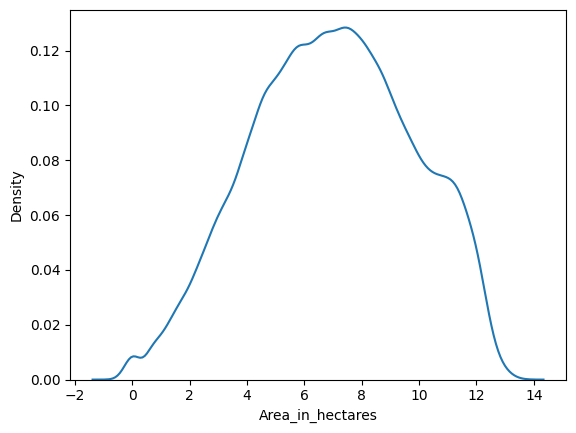

In [164]:
# df["Area_in_hectares"] = np.log(df["Area_in_hectares"])
# sns.kdeplot(df["Area_in_hectares"])
# plt.show()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_Name        97233 non-null  object 
 1   Crop_Type         97233 non-null  object 
 2   Crop              97233 non-null  object 
 3   N                 97233 non-null  int64  
 4   P                 97233 non-null  int64  
 5   K                 97233 non-null  int64  
 6   pH                97233 non-null  float64
 7   rainfall          97233 non-null  float64
 8   temperature       97233 non-null  float64
 9   Area_in_hectares  97233 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 7.4+ MB


Encoding and Scaling

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C = ["State_Name","Crop_Type","Crop"]
le_D = {}
for i in C:
    le_D[i] = LabelEncoder()
    df[i] = le_D[i].fit_transform(df[i])

bulk_scaler = StandardScaler()
features_to_scale = ["State_Name","Crop_Type","N","P","K","pH","rainfall","temperature","Area_in_hectares"]
#features_to_scale = ["N","P","K","pH","rainfall","temperature","Area_in_hectares"]
df[features_to_scale] = bulk_scaler.fit_transform(df[features_to_scale])

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97233 entries, 0 to 97232
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_Name        97233 non-null  float64
 1   Crop_Type         97233 non-null  float64
 2   Crop              97233 non-null  int32  
 3   N                 97233 non-null  float64
 4   P                 97233 non-null  float64
 5   K                 97233 non-null  float64
 6   pH                97233 non-null  float64
 7   rainfall          97233 non-null  float64
 8   temperature       97233 non-null  float64
 9   Area_in_hectares  97233 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 7.0 MB


State_Name             33
Crop_Type               4
Crop                   28
N                      14
P                       8
K                       9
pH                     80
rainfall              106
temperature           105
Area_in_hectares    26283
dtype: int64

In [168]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data=df
features = features_to_scale
X = torch.tensor(data[features].values, dtype=torch.float32)
y = torch.tensor(data['Crop'].values, dtype=torch.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
def recommend_crops(model, crop_data, num_recommendations=5):
    model.eval()
    with torch.no_grad():
        crop_embeddings = model(crop_data)
        recommendations = []
        
        for i, crop_embedding in enumerate(crop_embeddings):
            similarities = cosine_similarity(crop_embedding.unsqueeze(0), crop_embeddings)
            top_k_indices = similarities.squeeze().argsort(descending=True)[1:num_recommendations+1]  
            recommended_crops = [(idx.item(), similarities[idx].item()) for idx in top_k_indices]
            recommendations.append((i, recommended_crops))
        
    
    return recommendations

def precision_at_k(recommended_crops, true_crops, k=5):
    correct_recommendations = 0
    total_recommendations = 0
    
    for idx, recs in recommended_crops:
        true_crop = true_crops[idx].item()
        recommended_crop_indices = [rec[0] for rec in recs[:k]]
        recommended_crop_types = [true_crops[i].item() for i in recommended_crop_indices]
        
        if true_crop in recommended_crop_types:
            correct_recommendations += 1
        
        total_recommendations += 1
    
    return correct_recommendations / total_recommendations if total_recommendations > 0 else 0

def cosine_similarity(embedding, embeddings):
    return torch.matmul(embeddings, embedding.T)

For Epoch 1000 ,  Cross Entropy Loss : 0.1436
Precision at 5: 35.6456
Average time taken per recommendation: 1.5413165920012567e-07 seconds


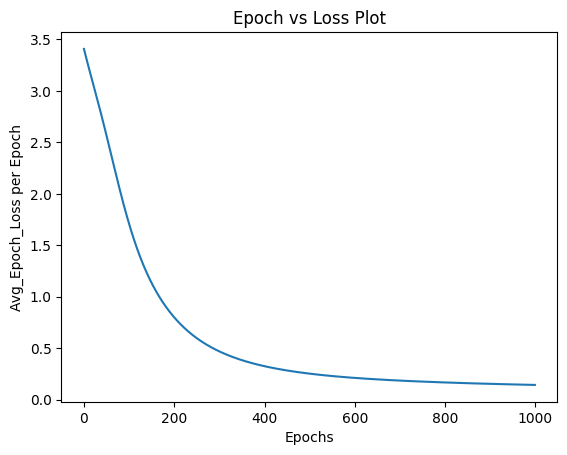

In [171]:
class CropEmbeddingModel(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(CropEmbeddingModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.rel1 = nn.ReLU()
        self.fc2 = nn.Linear(64, embedding_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.rel1(x)
        x = self.fc2(x)
        return x
        #return F.normalize(x, p=2, dim=1)

input_dim = X.shape[1]
num_unique_crops = len(data['Crop'].unique())
embedding_dim = num_unique_crops
model = CropEmbeddingModel(input_dim, embedding_dim)

criterion = nn.CrossEntropyLoss()
#criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

xt = []
yt = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    xt.append(epoch)
    yt.append(loss.item())
    
    # if (epoch+1) % 10 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

xt = np.array(xt)
yt = np.array(yt)
test_recommendations, avg_time_per_recommendation = recommend_crops(model, X_test)
precision_k = precision_at_k(test_recommendations, y_test, k=5)
print(f"For Epoch {xt[-1] + 1} ,  Cross Entropy Loss : {yt[-1]:.4f}")
print(f'Precision at 5: {precision_k*100:.4f}')
print(f'Average time taken per recommendation: {avg_time_per_recommendation} seconds')
plt.plot(xt,yt)
plt.xlabel("Epochs")
plt.ylabel("Avg_Epoch_Loss per Epoch")
plt.title("Epoch vs Loss Plot")
plt.show()


Normalized O/P
For Epoch 1000 ,  Cross Entropy Loss : 2.4217
Precision at 5: 99.4601
Average time taken per recommendation: 1.0355950725926356e-07 seconds


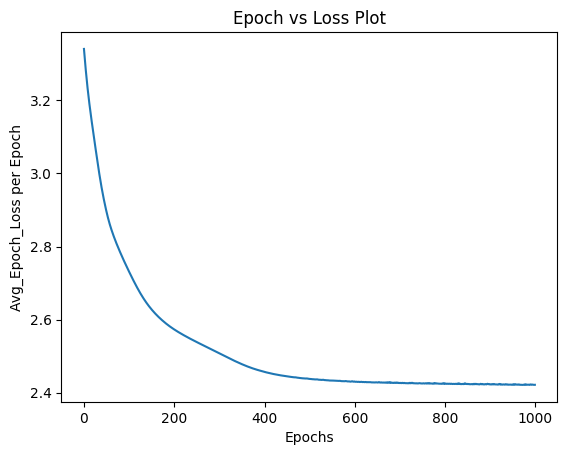

In [172]:
class CropEmbeddingModel(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(CropEmbeddingModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.rel1 = nn.ReLU()
        self.fc2 = nn.Linear(64, embedding_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.rel1(x)
        x = self.fc2(x)
        #return x
        return F.normalize(x, p=2, dim=1)
    
input_dim = X.shape[1]
num_unique_crops = len(data['Crop'].unique())
embedding_dim = num_unique_crops
model = CropEmbeddingModel(input_dim, embedding_dim)

criterion = nn.CrossEntropyLoss()
#criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

xt = []
yt = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    xt.append(epoch)
    yt.append(loss.item())
    
    # if (epoch+1) % 10 == 0:
    #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

xt = np.array(xt)
yt = np.array(yt)
print("Normalized O/P")
print(f"For Epoch {xt[-1] + 1} ,  Cross Entropy Loss : {yt[-1]:.4f}")
test_recommendations, avg_time_per_recommendation = recommend_crops(model, X_test)
precision_k = precision_at_k(test_recommendations, y_test, k=5)
print(f'Precision at 5: {precision_k*100:.4f}')
print(f'Average time taken per recommendation: {avg_time_per_recommendation} seconds')
plt.plot(xt,yt)
plt.xlabel("Epochs")
plt.ylabel("Avg_Epoch_Loss per Epoch")
plt.title("Epoch vs Loss Plot")
plt.show()